# 머신러닝 알고리즘 실습

## 지도 학습 (Supervised Learning)

### 1. 데이터셋 준비 및 분석

Iris 데이터셋은 세 가지 종류의 아이리스 꽃(세토사, 버시컬러, 버지니카)에 대한 꽃받침과 꽃잎의 길이와 너비 정보를 담고 있습니다. 이 데이터셋을 이용해 다음의 알고리즘을 적용해보겠습니다: 나이브 베이즈, 의사결정 트리, SVM.

먼저, 데이터셋을 살펴보겠습니다.


In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df["species"] = y

# 데이터셋 확인
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


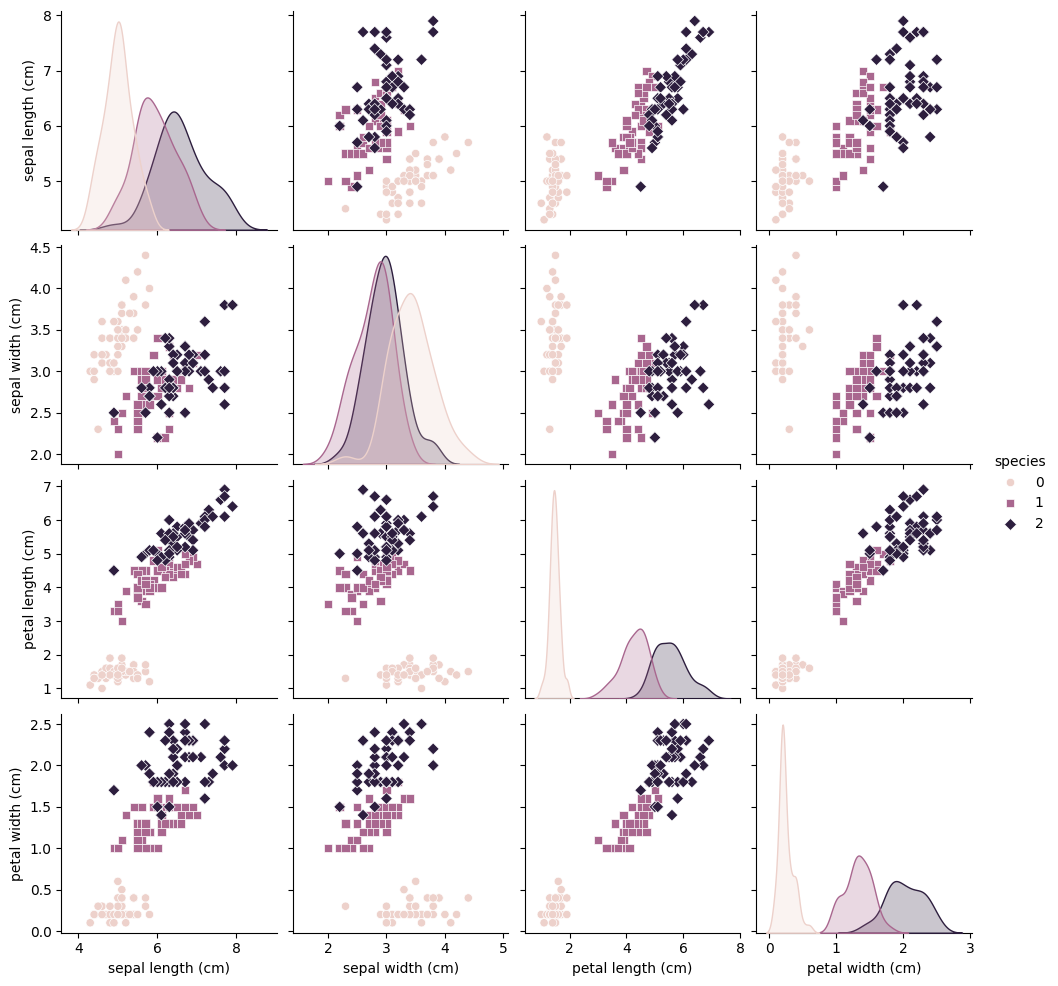

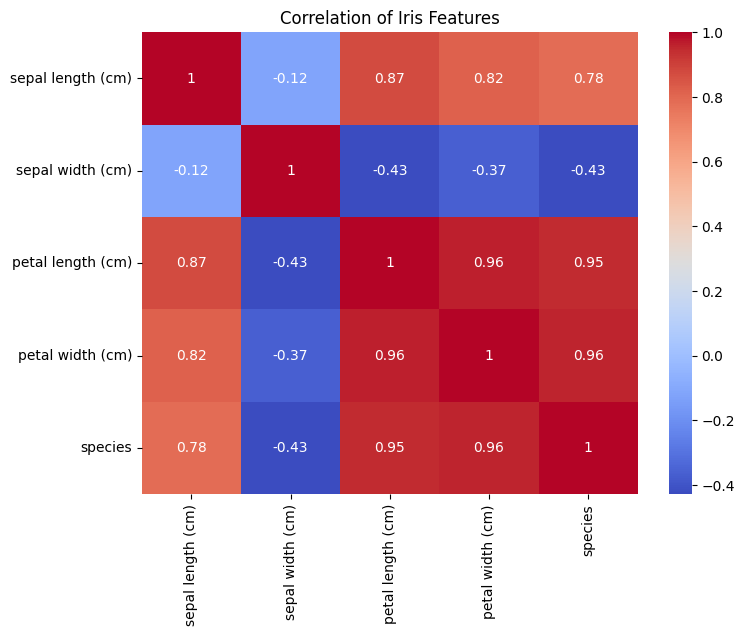

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋의 기본적인 통계량 확인
iris_stats = iris_df.describe()
print(iris_stats)

# 종(species)별 특성 분포 확인을 위한 시각화
sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"])
plt.show()

# 특성 간 상관 관계 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Iris Features")
plt.show()

1. **기본 통계량**:

   - 총 150개의 샘플
   - 꽃받침(Sepal)과 꽃잎(Petal)의 길이 및 너비에 대한 평균, 표준편차, 최소값, 최대값 등을 포함한 기본 통계량 제공
   - 예를 들어, 꽃잎 길이(petal length)의 평균은 약 3.76cm, 표준편차는 약 1.77cm

2. **특성 분포 및 종별 구분**:

   - Pairplot을 통해 각 특성(꽃받침과 꽃잎의 길이 및 너비) 간의 분포와 관계를 시각화
   - 다양한 색상의 점들은 서로 다른 아이리스 꽃 종(세토사, 버시컬러, 버지니카)을 나타냄
   - 꽃잎의 길이와 너비를 기준으로 종 간에 분명한 구분이 관찰됨

3. **특성 간 상관 관계**:
   - 특성 간의 상관 관계를 나타내는 히트맵 제공
   - 각 셀에는 두 특성 간의 상관 계수 표시
   - 예를 들어, 꽃잎 길이와 꽃잎 너비 간에는 높은 양의 상관 관계가 있음을 알 수 있음

이러한 분석을 통해 Iris 데이터셋의 기본적인 특성을 이해하고, 각 아이리스 종별로 특성이 어떻게 다른지 파악할 수 있습니다. 이는 향후 머신러닝 모델을 설계하고 훈련하는 데 있어 중요한 기초 정보를 제공합니다.


### 2. 나이브 베이즈 분류기

나이브 베이즈는 조건부 확률을 기반으로 분류를 수행하는 간단하면서도 효과적인 알고리즘입니다.


In [3]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 나이브 베이즈 모델 생성 및 훈련
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = gnb.predict(X_test)

# 성능 평가
print("Naive Bayes 분류기의 정확도:", accuracy_score(y_test, y_pred))

Naive Bayes 분류기의 정확도: 0.9777777777777777


### 3. 의사결정 트리

의사결정 트리는 데이터를 나누는 결정 규칙을 트리 구조로 나타내어 분류를 수행합니다.


In [4]:
# 의사결정 트리 모델 생성 및 훈련
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = dtc.predict(X_test)

# 성능 평가
print("의사결정 트리 분류기의 정확도:", accuracy_score(y_test, y_pred))

의사결정 트리 분류기의 정확도: 1.0


### 4. SVM (Support Vector Machine)

SVM은 데이터를 가장 잘 구분하는 경계를 찾아내어 분류를 수행하는 알고리즘입니다.


In [5]:
# SVM 모델 생성 및 훈련
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = svm.predict(X_test)

# 성능 평가
print("SVM 분류기의 정확도:", accuracy_score(y_test, y_pred))

SVM 분류기의 정확도: 1.0


### 5. 분류 알고리즘 적용 결과

1. **나이브 베이즈 분류기 (Naive Bayes Classifier)**:

   - 정확도: 약 97.78%

2. **의사결정 트리 (Decision Tree Classifier)**:

   - 정확도: 100%

3. **SVM (Support Vector Machine)**:

   - 정확도: 100%

이 결과들은 Iris 데이터셋에 세 가지 다른 분류 알고리즘을 적용한 것으로, 각 모델의 성능을 평가할 수 있는 좋은 예시가 됩니다. 의사결정 트리와 SVM이 완벽한 정확도를 보인 반면, 나이브 베이즈는 약간 낮은 정확도를 나타냈습니다. 이러한 차이는 각 알고리즘의 특성과 데이터셋의 특징에 기인할 수 있습니다.
